In [31]:
# Basic library
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns
#import pydot

# Evaluation library
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# DeepLearning libraries

#!pip install tensorflow==2.18.0
#!pip install scikeras

import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [32]:
#tf.keras.version()
#!pip show tensorflow


In [33]:
# Load the Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit)=mnist.load_data()

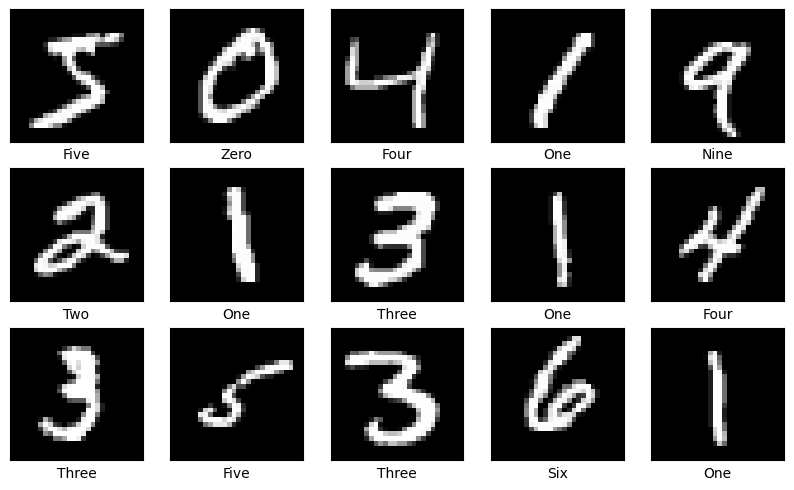

In [34]:
#Names of numbers in the dataset in order

col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine' ]

# Visualization the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [35]:
# preprocessing the input
X_train_digit.shape

(60000, 28, 28)

In [36]:
X_test_digit.shape

(10000, 28, 28)

In [37]:
## preprocessing the inputs as 2D inputs...
# Flatten the rows and columns of each image, since ANN accepts 2D input
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit= X_test_digit.reshape(10000, 784)

In [38]:
X_train_digit.shape

(60000, 784)

In [47]:
# Preprocesing the output
y_test_digit.shape


(10000,)

In [51]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
## Encoding Digit MNIST Labels  ### one hot encoding
y_train_digit = to_categorical(y_train_digit, num_classes=10)  # converting integers to binary classs matrix

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [55]:
y_train_digit[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

###There by the input to ANN should be 2D and output should be in one hot encoding...

In [12]:
## Creating base neural network

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)), ## inputlayer -> hidden layer(1) ...no of neurans, activation function, input 
    #layer.dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'), ## next hidden layer (2) ## no of neurans, activation function
    #layer.dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation= 'relu'), ## next hiden layer (3), no of neurans, activation function
    #layer.dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(10, activation = 'sigmoid'), ## output layer
])


/opt/anaconda3/envs/venvaiml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Param number = ouput_channel_number *(input_channel-number +1)
# 256*(784+1) = 200,960
# 64*(256+1) = 16,448
# 64*(64+1) = 4160
# 10*(64+1) =650

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
history = model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(X_test_digit, y_test_digit) )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7595 - loss: 4.9885 - val_accuracy: 0.9201 - val_loss: 0.3415
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9339 - loss: 0.2719 - val_accuracy: 0.9458 - val_loss: 0.2196
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9564 - loss: 0.1540 - val_accuracy: 0.9542 - val_loss: 0.1755
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9685 - loss: 0.1096 - val_accuracy: 0.9567 - val_loss: 0.1860
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0944 - val_accuracy: 0.9580 - val_loss: 0.1668
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9732 - loss: 0.0877 - val_accuracy: 0.9624 - val_loss: 0.1476
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9772 - loss: 0.0750 - val_accuracy: 0.9620 - val_loss: 0.1611
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9812 - loss: 0.0621 - val_accuracy: 0.

In [16]:
#Predicting the labels-Digit
y_pred = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


In [17]:
y_pred[0]


array([2.2717495e-09, 1.8300749e-01, 9.9996918e-01, 9.9992782e-01,
       1.3166260e-02, 9.9602288e-01, 2.0373278e-23, 1.0000000e+00,
       5.7009281e-08, 9.9998772e-01], dtype=float32)

In [18]:
y_predicts = np.argmax(y_pred, axis=1)

In [19]:
y_predicts

array([7, 2, 1, ..., 1, 5, 6])

In [20]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
y_test_digit_eval = np.argmax(y_test_digit, axis=1)  

In [22]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
# Confusion matrix for Digit MNIST
con_matrix = confusion_matrix( y_test_digit_eval , y_predicts)
con_matrix

array([[ 969,    0,    2,    0,    1,    1,    3,    0,    3,    1],
       [   0, 1124,    3,    0,    0,    1,    2,    2,    3,    0],
       [   6,    1, 1012,    2,    1,    0,    2,    1,    7,    0],
       [ 364,  497,   29,  102,    0,    7,    0,    3,    8,    0],
       [   5,   83,  126,    0,  757,    0,    3,    2,    3,    3],
       [ 346,   34,    7,  161,   11,  326,    5,    0,    1,    1],
       [  27,    4,   12,    0,   33,   59,  820,    0,    3,    0],
       [   1,    5,  153,   34,    5,   31,    0,  786,    6,    7],
       [  15,    3,    3,    6,    1,   11,    3,    3,  929,    0],
       [ 626,    5,   18,   74,   81,   25,    0,   28,   21,  131]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval, y_predicts))

              precision    recall  f1-score   support

           0       0.41      0.99      0.58       980
           1       0.64      0.99      0.78      1135
           2       0.74      0.98      0.84      1032
           3       0.27      0.10      0.15      1010
           4       0.85      0.77      0.81       982
           5       0.71      0.37      0.48       892
           6       0.98      0.86      0.91       958
           7       0.95      0.76      0.85      1028
           8       0.94      0.95      0.95       974
           9       0.92      0.13      0.23      1009

    accuracy                           0.70     10000
   macro avg       0.74      0.69      0.66     10000
weighted avg       0.74      0.70      0.66     10000



In [25]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


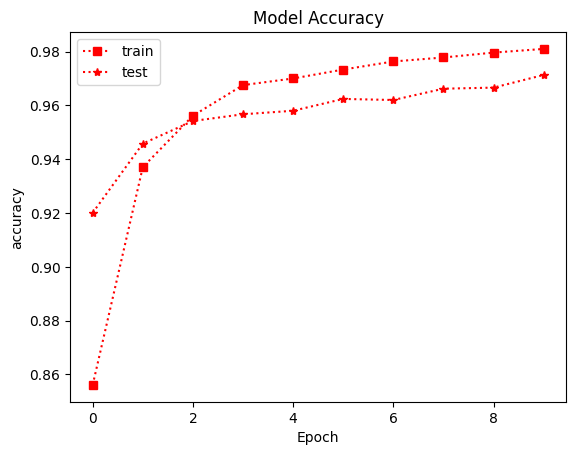

In [28]:
# Summarize history of accuracy


plt.plot(history.history['accuracy'],'s:r')
plt.plot(history.history['val_accuracy'],'*:r')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()

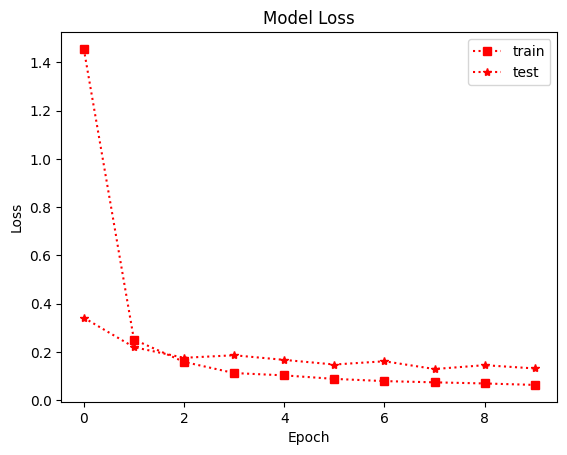

In [27]:
### # Summarize history of  MOdel Loss

plt.plot(history.history['loss'],'s:r')
plt.plot(history.history['val_loss'],'*:r')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='best')
plt.show()